496


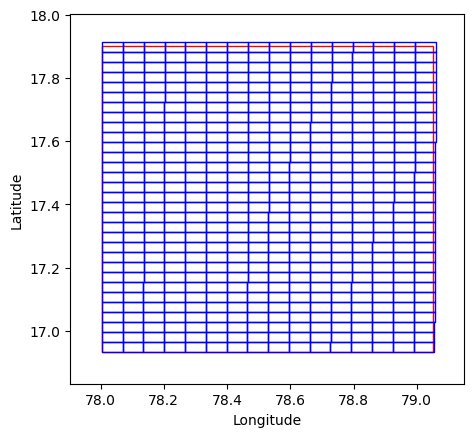

In [6]:
from geopy.distance import geodesic
from shapely.geometry import box, Polygon
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon as ShapelyPolygon
from matplotlib.patches import Polygon as MatplotlibPolygon
from matplotlib.collections import PatchCollection

def generate_boxes_within_bbox(bbox, box_width_km, box_height_km):
    min_lon, min_lat, max_lon, max_lat = bbox
    origin = (min_lat, min_lon)
    
    boxes = []
    
    current_lat = min_lat
    while current_lat < max_lat:
        current_lon = min_lon
        while current_lon < max_lon:
            # Calculate the top-right corner of the box
            bottom_left = (current_lat, current_lon)
            top_right_lat = geodesic(kilometers=box_height_km).destination(bottom_left, 0).latitude
            top_right_lon = geodesic(kilometers=box_width_km).destination(bottom_left, 90).longitude
            
            # Create a polygon for the box
            box_polygon = box(current_lon, current_lat, top_right_lon, top_right_lat)
            
            # Ensure that the box is within the original bounding box
            if box_polygon.intersects(Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])):
                boxes.append(box_polygon)
            
            current_lon = top_right_lon
        
        current_lat = top_right_lat
    print(len(boxes))
    return boxes

def plot_boxes(bbox, boxes):
    fig, ax = plt.subplots()

    # Plot the bounding box
    min_lon, min_lat, max_lon, max_lat = bbox
    bbox_polygon = ShapelyPolygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])
    bbox_patch = MatplotlibPolygon(list(bbox_polygon.exterior.coords), closed=True, edgecolor='red', fill=None)
    ax.add_patch(bbox_patch)
    
    # Plot the smaller boxes
    patches = []
    for box in boxes:
        polygon = MatplotlibPolygon(list(box.exterior.coords), closed=True, edgecolor='blue', fill=None)
        patches.append(polygon)
    
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)
    
    ax.set_xlim(min_lon - 0.1, max_lon + 0.1)
    ax.set_ylim(min_lat - 0.1, max_lat + 0.1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage
bbox = (78.00405826,16.93264351,79.04971836,17.90150706)  # Example bbox: (min_lon, min_lat, max_lon, max_lat)
box_width_km = 7  # Width of each small box in km
box_height_km = 3.5  # Height of each small box in km

small_boxes = generate_boxes_within_bbox(bbox, box_width_km, box_height_km)

# Plot the bounding box and the smaller boxes
plot_boxes(bbox, small_boxes)


In [8]:
print(496/16)

31.0


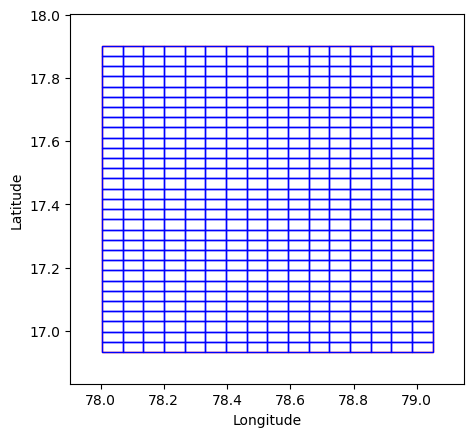

In [11]:
import matplotlib.pyplot as plt
from shapely.geometry import box
from matplotlib.patches import Polygon as MatplotlibPolygon
from matplotlib.collections import PatchCollection

def divide_bbox(bbox, n_rows, n_cols):
    min_lon, min_lat, max_lon, max_lat = bbox
    
    # Calculate the increments
    lat_increment = (max_lat - min_lat) / n_rows
    lon_increment = (max_lon - min_lon) / n_cols
    
    boxes = []
    
    for i in range(n_rows):
        for j in range(n_cols):
            # Calculate the corners of the current box
            start_lat = min_lat + i * lat_increment
            start_lon = min_lon + j * lon_increment
            end_lat = start_lat + lat_increment
            end_lon = start_lon + lon_increment
            
            # Create a box polygon and store it
            boxes.append(box(start_lon, start_lat, end_lon, end_lat))
    
    return boxes

def plot_boxes(bbox, boxes):
    fig, ax = plt.subplots()

    # Plot the bounding box
    min_lon, min_lat, max_lon, max_lat = bbox
    bbox_polygon = MatplotlibPolygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)], closed=True, edgecolor='red', fill=None)
    ax.add_patch(bbox_polygon)
    
    # Plot the smaller boxes
    patches = []
    for box in boxes:
        polygon = MatplotlibPolygon(list(box.exterior.coords), closed=True, edgecolor='blue', fill=None)
        patches.append(polygon)
    
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)
    
    ax.set_xlim(min_lon - 0.1, max_lon + 0.1)
    ax.set_ylim(min_lat - 0.1, max_lat + 0.1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage
bbox = (78.00405826,16.93264351,79.04971836,17.90150706)  # Example bbox: (min_lon, min_lat, max_lon, max_lat)
n_rows = 30  # Number of rows (height)
n_cols = 16  # Number of columns (width)

small_boxes = divide_bbox(bbox, n_rows, n_cols)

# Plot the bounding box and the smaller boxes
plot_boxes(bbox, small_boxes)


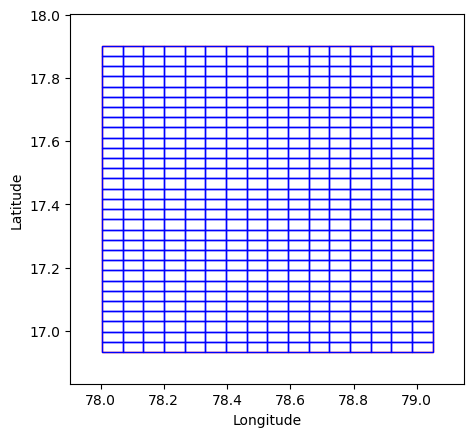

Longitudes: [78.036735138125, 78.102088894375, 78.16744265062499, 78.232796406875, 78.29815016312502, 78.363503919375, 78.428857675625, 78.494211431875, 78.559565188125, 78.624918944375, 78.69027270062499, 78.755626456875, 78.82098021312501, 78.886333969375, 78.951687725625, 79.017041481875]
Latitudes: [17.885359334166665, 17.8530638825, 17.820768430833333, 17.788472979166663, 17.7561775275, 17.72388207583333, 17.691586624166668, 17.659291172499998, 17.626995720833335, 17.594700269166665, 17.562404817500003, 17.530109365833333, 17.497813914166663, 17.4655184625, 17.43322301083333, 17.400927559166668, 17.368632107499998, 17.336336655833335, 17.304041204166666, 17.271745752499996, 17.239450300833333, 17.207154849166667, 17.1748593975, 17.14256394583333, 17.110268494166668, 17.077973042500002, 17.04567759083333, 17.01338213916667, 16.981086687499996, 16.948791235833333]


In [28]:
import matplotlib.pyplot as plt
from shapely.geometry import box
from matplotlib.patches import Polygon as MatplotlibPolygon
from matplotlib.collections import PatchCollection
import numpy as np
def divide_bbox(bbox, n_rows, n_cols):
    min_lon, min_lat, max_lon, max_lat = bbox
    
    # Calculate the increments
    lat_increment = (max_lat - min_lat) / n_rows
    lon_increment = (max_lon - min_lon) / n_cols
    
    boxes = []
    
    for i in range(n_rows):
        for j in range(n_cols):
            # Calculate the corners of the current box
            start_lat = min_lat + i * lat_increment
            start_lon = min_lon + j * lon_increment
            end_lat = start_lat + lat_increment
            end_lon = start_lon + lon_increment
            
            # Create a box polygon and store it
            boxes.append(box(start_lon, start_lat, end_lon, end_lat))
    
    return boxes

def plot_boxes(bbox, boxes):
    fig, ax = plt.subplots()

    # Plot the bounding box
    min_lon, min_lat, max_lon, max_lat = bbox
    bbox_polygon = MatplotlibPolygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)], closed=True, edgecolor='red', fill=None)
    ax.add_patch(bbox_polygon)
    
    # Plot the smaller boxes
    patches = []
    for box in boxes:
        polygon = MatplotlibPolygon(list(box.exterior.coords), closed=True, edgecolor='blue', fill=None)
        patches.append(polygon)
    
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)
    
    ax.set_xlim(min_lon - 0.1, max_lon + 0.1)
    ax.set_ylim(min_lat - 0.1, max_lat + 0.1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def get_centroid_coordinates(boxes):
    longitudes = []
    latitudes = []
    
    for box in boxes:
        centroid = box.centroid
        longitudes.append(centroid.x)
        latitudes.append(centroid.y)
    
    return longitudes, latitudes

# Example usage
bbox = (78.00405826,16.93264351,79.04971836,17.90150706)  # Example bbox: (min_lon, min_lat, max_lon, max_lat)
n_rows = 30  # Number of rows (height)
n_cols = 16  # Number of columns (width)

small_boxes = divide_bbox(bbox, n_rows, n_cols)

# Plot the bounding box and the smaller boxes
plot_boxes(bbox, small_boxes)

# Get the lists of longitudes and latitudes of the centroids
longitudes, latitudes = get_centroid_coordinates(small_boxes)
longitudes=np.sort(list(set(longitudes)))
latitudes=np.sort(list(set(latitudes)))[::-1]
# Print the lists
print("Longitudes:", list(longitudes))
print("Latitudes:", list(latitudes))


In [27]:
import numpy as np
np.savetxt('long.csv', longitudes, fmt='%.6f', delimiter=',')

# Save latitudes to a CSV file with a specified format
np.savetxt('lat.csv', latitudes, fmt='%.6f', delimiter=',')
print(list(longitudes))

[78.036735138125, 78.102088894375, 78.16744265062499, 78.232796406875, 78.29815016312502, 78.363503919375, 78.428857675625, 78.494211431875, 78.559565188125, 78.624918944375, 78.69027270062499, 78.755626456875, 78.82098021312501, 78.886333969375, 78.951687725625, 79.017041481875]
